In [5]:
#packages 
import numpy as np
import pandas as pd
from sklearn import svm

#visualization
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(font_scale=1.2)
%matplotlib inline


In [53]:
#opening data
df = pd.read_csv('E:\Daviance\Data compressed\heart.csv')
print(df.head())

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1  


In [54]:
# description of the data.
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


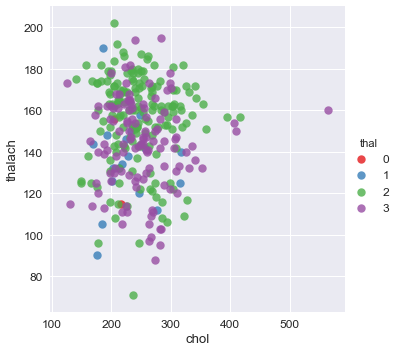

In [97]:
# plot the data.
sns.lmplot('chol','thalach',data=df,hue='thal',palette='Set1',fit_reg=False,scatter_kws={"s":70});

In [89]:
#format or pre-process data
type_label = np.where(df['thal']== 0,0,1)
d_features = df.columns.values[1:].tolist()
d_features

['sex',
 'cp',
 'trestbps',
 'chol',
 'fbs',
 'restecg',
 'thalach',
 'exang',
 'oldpeak',
 'slope',
 'ca',
 'thal',
 'target']

In [90]:
android=df[['chol','thalach']].values
print(android)

[[233 150]
 [250 187]
 [204 172]
 [236 178]
 [354 163]
 [192 148]
 [294 153]
 [263 173]
 [199 162]
 [168 174]
 [239 160]
 [275 139]
 [266 171]
 [211 144]
 [283 162]
 [219 158]
 [340 172]
 [226 114]
 [247 171]
 [239 151]
 [234 161]
 [233 179]
 [226 178]
 [243 137]
 [199 178]
 [302 162]
 [212 157]
 [175 123]
 [417 157]
 [197 152]
 [198 168]
 [177 140]
 [219 188]
 [273 152]
 [213 125]
 [177 160]
 [304 170]
 [232 165]
 [269 148]
 [360 151]
 [308 142]
 [245 180]
 [208 148]
 [264 143]
 [321 182]
 [325 172]
 [235 180]
 [257 156]
 [216 115]
 [234 160]
 [256 149]
 [302 151]
 [231 146]
 [141 175]
 [252 172]
 [201 158]
 [222 186]
 [260 185]
 [182 174]
 [303 159]
 [265 130]
 [309 156]
 [186 190]
 [203 132]
 [211 165]
 [183 182]
 [222 143]
 [234 175]
 [220 170]
 [209 163]
 [258 147]
 [227 154]
 [204 202]
 [261 186]
 [213 165]
 [250 161]
 [245 166]
 [221 164]
 [205 184]
 [240 154]
 [250 179]
 [308 170]
 [318 160]
 [298 178]
 [265 122]
 [564 160]
 [277 151]
 [197 156]
 [214 158]
 [248 122]
 [255 175]

In [93]:
#fit model
model= svm.SVC(kernel='linear')
model.fit(android,type_label)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [94]:
#get the separating hyperplane
w = model.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(30, 60)
yy = a* xx -(model.intercept_[0]) / w[1]

#plot the parallels to the separating hyperplane that pass through the support vector

b = model.support_vectors_[0]
yy_down = a * xx + (b[1] - a*b[0])
b = model.support_vectors_[-1]
yy_up = a * xx + (b[1] - a *b[0])



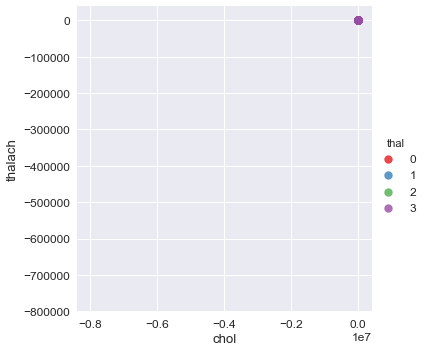

In [112]:
sns.lmplot('chol','thalach',data=df,hue='thal',palette='Set1',fit_reg=False,scatter_kws={"s":70});
plt.plot(xx, yy, linewidth=2, color='red')
plt.plot(xx,yy_down,'k--')
plt.plot(xx,yy_up,'k--')
plt.plot(-8000000,0, markersize ='9')

In [114]:
# function to predicct thalach or thal
def predict(thalach,chol):
    if(model.predict([[thalach,chol]]))== 0:
        print("thalach disease")
    else:
        print("chol disease")
        
predict(-8000000,0)

thalach disease
